# Análise exploratória de dados

**Importando Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from scipy.stats import linregress


## 1. Leitura do conjunto de dados

In [2]:
df= pd.read_csv("../data/raw/wines_SPA.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


## 2. Descrição dos dados

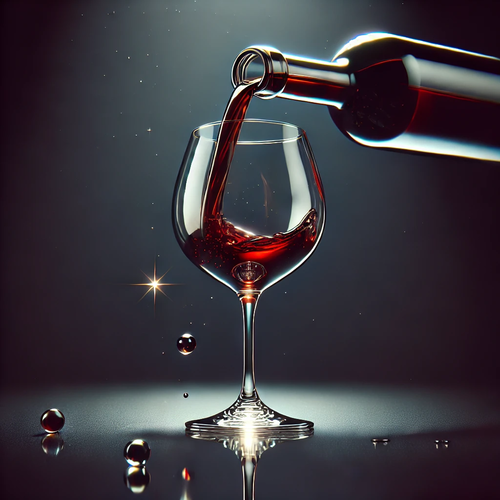

O conjunto de dados de vinhos apresenta informações detalhadas sobre vinícolas, tipos de vinhos e suas características, incluindo o ano de produção e avaliações de qualidade. A variável vinícola identifica o produtor do vinho, enquanto vinho se refere ao nome específico do produto. A variável ano indica o ano de produção, e avaliação representa a média de avaliações recebidas pelo vinho, refletindo sua qualidade em uma escala definida.

A popularidade de cada vinho pode ser observada pela variável num_avaliações, que indica o número de avaliações recebidas. A variável região especifica a região de origem, permitindo identificar características típicas de cada local. O preço reflete o valor médio do vinho, enquanto tipo informa a variedade (como tinto ou branco). As variáveis corpo e acidez fornecem detalhes adicionais sobre as propriedades sensoriais, indicando a intensidade e o nível de acidez em uma escala qualitativa.

Esse conjunto de dados, com variáveis quantitativas e qualitativas, oferece uma base robusta para análises que exploram os fatores que influenciam as avaliações e a preferência dos consumidores, além de permitir comparações entre regiões, anos de produção e tipos de vinho.

#### 2.1 **Dicionário**

In [3]:
data_path = Path('../data/external/dictionary.csv')
# data_path = Path('dictionary.csv')
df_dictionary = pd.read_csv(data_path, sep=',') 
df_dictionary

,variavel,descricao,tipo,subtipo
0,winery,Nome da vinícola,qualitativa,nominal
1,wine,Nome do vinho,qualitativa,nominal
2,year,Ano em que as uvas foram colhidas,quantitativa,discreta
3,rating,Avaliação média dada ao vinho pelos usuários [...,quantitativa,contínua
4,num_reviews,Número de usuários que avaliaram o vinho,quantitativa,discreta
5,country,País de origem [Espanha],qualitativa,nominal
6,region,Região do vinho,qualitativa,nominal
7,price,Preço em euros [€],quantitativa,contínua
8,type,Variedade de vinho,qualitativa,nominal
9,body,"Pontuação de corpo, definida como a riqueza e ...",qualitativa,ordinal


### 2.2 Análise e Modificações de Colunas e Variáveis

**Transformação dos nomes de colunas para pt-BR**

In [4]:
# Renomeando as colunas
df.rename(columns={
    'winery': 'vinícola',
    'wine': 'vinho',
    'year': 'ano',
    'rating': 'avaliação',
    'num_reviews': 'num_avaliações',
    'country': 'país',
    'region': 'região',
    'price': 'preço',
    'type': 'tipo',
    'body': 'corpo',
    'acidity': 'acidez'
    
}, inplace=True)


df.head(5)

,vinícola,vinho,ano,avaliação,num_avaliações,país,região,preço,tipo,corpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


**Verificando os valores da coluna país**

In [5]:
df["país"].value_counts() 

Espana    7500
Name: país, dtype: int64

* Observa-se que todas as linhas dessa coluna possuem o mesmo valor então ela será descartada

In [6]:
df = df.drop(columns=['país'])
df.head(5)

,vinícola,vinho,ano,avaliação,num_avaliações,região,preço,tipo,corpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


**Informações sobre o dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   vinícola        7500 non-null   object 
 1   vinho           7500 non-null   object 
 2   ano             7498 non-null   object 
 3   avaliação       7500 non-null   float64
 4   num_avaliações  7500 non-null   int64  
 5   região          7500 non-null   object 
 6   preço           7500 non-null   float64
 7   tipo            6955 non-null   object 
 8   corpo           6331 non-null   float64
 9   acidez          6331 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 586.1+ KB


* Ao todo são 10 colunas e 7500 linhas. É possível observar a presença de nulos em ano, tipo, corpo e acidez pois essas colunas possuem números de linhas inferiores a 7500

**Contagem de valores nulos por coluna**

In [8]:
print(df.isnull().sum()) 

vinícola             0
vinho                0
ano                  2
avaliação            0
num_avaliações       0
região               0
preço                0
tipo               545
corpo             1169
acidez            1169
dtype: int64


**Verificando valores únicos em Ano**

In [9]:
df['ano'].unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

* Observamos o valor N.V. (Non Vintage), que indica um vinho sem safra, produzido a partir de uvas colhidas em diferentes anos. Assim, vamos identificar quantos registros contêm esse valor e substituí-lo por NaN, permitindo uma análise mais precisa na coluna referente ao ano.

In [10]:
df['ano'] = df['ano'].replace('N.V.', np.nan)
#df['ano'] = df['ano'].fillna(np.nan).astype('Int64')
#df['ano'] = pd.to_datetime(df['ano'], format='%Y')

df['ano'] = pd.to_datetime(df['ano'], format= '%Y')
df['ano'] = df['ano'].dt.year

print(f"Quantidade de vinhos sem safra (ano): {df['ano'].isnull().sum()}")

Quantidade de vinhos sem safra (ano): 290


**Verificando Duplicatas**

In [11]:
duplicatas = df.duplicated().value_counts()
duplicatas

True     5452
False    2048
dtype: int64

**Convertendo o tipo de preço para float e padronizando as casas decimais**

In [12]:
df['preço'] = df['preço'].astype(float)# Convertendo para float
df['preço'] = df['preço'].round(2)# Padronizando com duas casas decimais

**Convertendo os tipos de corpo e acidez para inteiro**

* Seria interessante tentar tratar os NAN para não precisar converter eles para valor 0

In [13]:
df['corpo'] = df['corpo'].fillna(0).astype(int)
df['acidez'] = df['acidez'].fillna(0).astype(int)

In [14]:
df.head()

,vinícola,vinho,ano,avaliação,num_avaliações,região,preço,tipo,corpo,acidez
0,Teso La Monja,Tinto,2013.0,4.9,58,Toro,995.00,Toro Red,5,3
1,Artadi,Vina El Pison,2018.0,4.9,31,Vino de Espana,313.50,Tempranillo,4,2
2,Vega Sicilia,Unico,2009.0,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5,3
3,Vega Sicilia,Unico,1999.0,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5,3
4,Vega Sicilia,Unico,1996.0,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5,3


## 3. Perguntas de partida e hipóteses

1. Top 3 vinhos mais baratos e mais caros e suas respectivas vinícolas
2. O tipo de vinho afeta a avaliação média ou o preço?
3. Há alguma relação entre a avaliação (rating) e o preço (price) médio dos vinhos?
4. Quais são os melhores anos de vinhos avaliados? São os mais antigos?
5. A acidez ou o corpo dos vinhos influenciam a avaliação média dos usuários?
6. Correlação entre as variáveis. Quais as maiores e menores?

In [15]:
print("Tabela de características das variáveis qualitativas:\n")
df.describe(include=['object'])

Tabela de características das variáveis qualitativas:



,vinícola,vinho,região,tipo
count,7500,7500,7500,6955
unique,480,847,76,21
top,Contino,Reserva,Rioja,Rioja Red
freq,457,467,2440,2357


In [16]:
df.describe().round(2)

,ano,avaliação,num_avaliações,preço,corpo,acidez
count,7210.00,7500.00,7500.00,7500.00,7500.00,7500.00
mean,2013.50,4.25,451.11,60.10,3.51,2.49
std,6.94,0.12,723.00,150.36,1.60,1.09
min,1910.00,4.20,25.00,4.99,0.00,0.00
25%,2011.00,4.20,389.00,18.90,4.00,3.00
50%,2015.00,4.20,404.00,28.53,4.00,3.00
75%,2017.00,4.20,415.00,51.35,4.00,3.00
max,2021.00,4.90,32624.00,3119.08,5.00,3.00


A média das avaliações dos vinhos é de 4,25, com uma baixa dispersão (desvio padrão de 0,12), o que indica uma tendência positiva e consistente nas notas. O número de avaliações por vinho varia significativamente, com uma média de 451 avaliações, mas uma alta variabilidade (desvio padrão de 723), sugerindo que alguns vinhos são muito populares enquanto outros possuem poucas avaliações. O preço médio dos vinhos é de 60,10, com uma ampla faixa de valores (de 4,99 a 3119,08), o que reflete a diversidade dos produtos analisados.

Em relação às características sensoriais, o corpo tem uma média de 3,51 e a acidez de 2,49. A maioria dos vinhos apresenta corpo entre 3 e 5, enquanto a acidez se concentra entre 0 e 3. Essa concentração demonstra uma distribuição mais equilibrada para essas características, com maior frequência em níveis moderados a altos de corpo e baixos a moderados de acidez.

O intervalo interquartil dos dados revela que a maioria dos vinhos está nos níveis mais acessíveis de preço, corpo e acidez, enquanto os valores extremos indicam a presença de vinhos de alta gama ou com características sensoriais diferenciadas. Essas informações ajudam a compreender melhor a distribuição geral e os padrões de qualidade e preço dos vinhos na amostra.

#### 1. Top 3 vinhos mais baratos e mais caros e suas respectivas vinícolas

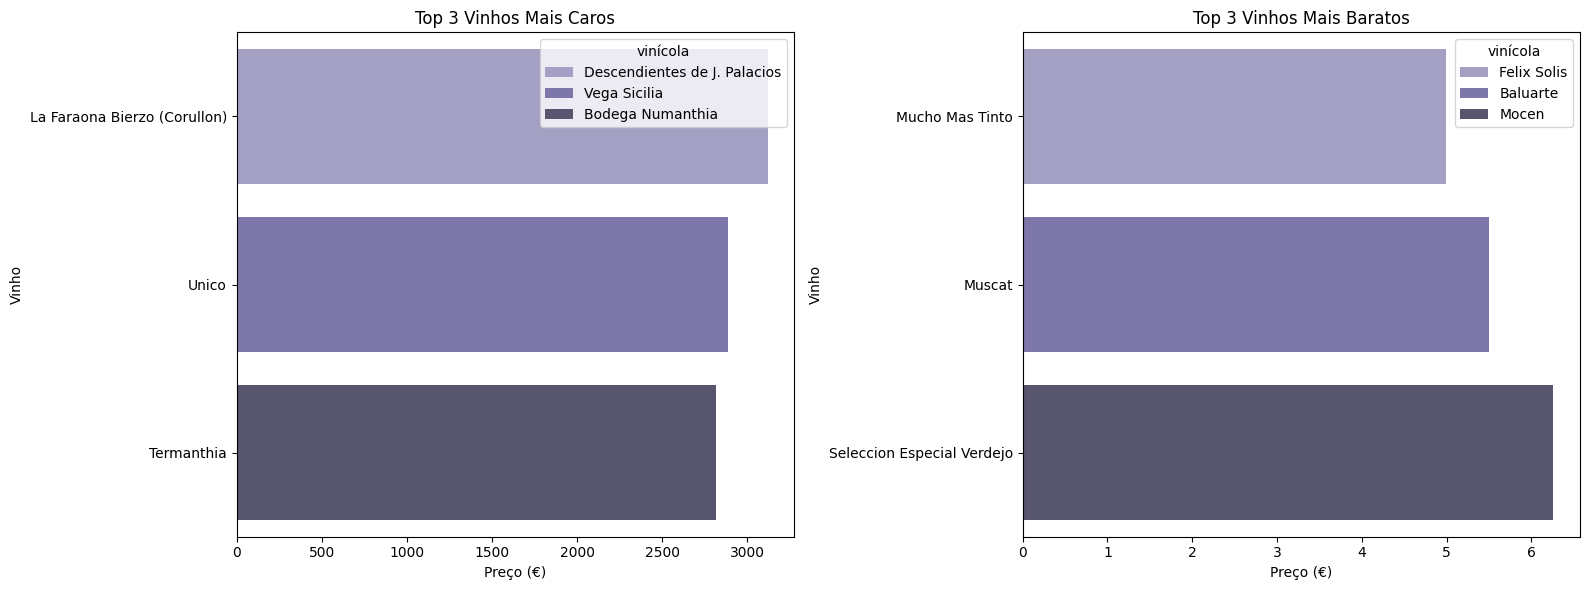

In [17]:
top_3_caros = df.nlargest(3, 'preço')[['vinho', 'preço', 'vinícola']]
top_3_baratos = df.nsmallest(3, 'preço')[['vinho', 'preço', 'vinícola']]

plt.figure(figsize=(16, 6))

# Gráfico dos vinhos mais caros
plt.subplot(1, 2, 1)
sns.barplot(x='preço', y='vinho', data=top_3_caros, hue='vinícola', palette='Purples_d', dodge=False)
plt.title('Top 3 Vinhos Mais Caros')
plt.xlabel('Preço (€)')
plt.ylabel('Vinho')

# Gráfico dos vinhos mais baratos
plt.subplot(1, 2, 2)
sns.barplot(x='preço', y='vinho', data=top_3_baratos, hue='vinícola', palette='Purples_d', dodge=False)
plt.title('Top 3 Vinhos Mais Baratos')
plt.xlabel('Preço (€)')
plt.ylabel('Vinho')

plt.tight_layout()
plt.show()

Os gráficos mostram os top 3 vinhos mais caros e vinhos mais baratos. É interessante perceber a discrepancia dos valores. Duas das vinícolas com vinhos mais caros ficam localizadas no Noroeste da espanha, uma região montanhosa, apenas Mocén – Vinícolas localizada na mesma região, possui um preço menor. No Centro-Norte temos Felix Solis e Baluarte que são vinícolas presentes nas regiões mais ao sul e centro, com menor altitude em comparação ao grupo anterior.

#### 2. **O tipo de vinho afeta a avaliação média?**

In [18]:
df['tipo'].unique()

array(['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Pedro Ximenez',
       'Red', 'Sherry', 'Priorat Red', 'Rioja Red', 'Rioja White',
       'Grenache', nan, 'Cava', 'Verdejo', 'Syrah', 'Monastrell',
       'Mencia', 'Sparkling', 'Montsant Red', 'Albarino', 'Chardonnay',
       'Cabernet Sauvignon', 'Sauvignon Blanc'], dtype=object)

Separação dos vinhos quanto ao tipo: 

**Vinhos Tintos:** Toro Red, Tempranillo,Ribera Del Duero Red, Red, Sherry,Priorat Red,Rioja Red,Grenache,Syrah,Monastrell,Mencia,Montsant Red,Cabernet Sauvignon.<br>

**Vinhos Brancos:** Rioja White, Verdejo, Albarino, Chardonnay, Sauvignon Blanc.<br>

**Vinhos Espumantes:** Cava, Sparkling.<br>

**Vinho Indefinido (nan):** Sem classificação

In [19]:
df["tipo"].value_counts()

Rioja Red               2357
Ribera Del Duero Red    1407
Red                      864
Priorat Red              674
Toro Red                 296
Tempranillo              291
Sherry                   274
Albarino                 252
Mencia                   235
Rioja White               92
Pedro Ximenez             35
Grenache                  35
Cava                      33
Verdejo                   27
Monastrell                18
Montsant Red              17
Syrah                     15
Chardonnay                13
Cabernet Sauvignon        11
Sparkling                  5
Sauvignon Blanc            4
Name: tipo, dtype: int64

**Criando as categorias e a função para categorias de vinhos**

In [20]:
categorias = {
    'Vinhos Tintos': ['Toro Red', 'Tempranillo', 'Ribera Del Duero Red', 'Red', 'Priorat Red', 
                      'Rioja Red', 'Grenache', 'Syrah', 'Monastrell', 'Mencia', 'Montsant Red', 
                      'Cabernet Sauvignon'],
    'Vinhos Brancos': ['Rioja White', 'Verdejo', 'Albarino', 'Chardonnay', 'Sauvignon Blanc'],
    'Vinhos Espumantes': ['Cava', 'Sparkling'],
    'Vinhos Fortificados': ['Sherry', 'Pedro Ximenez'],
    'Vinho Indefinido': [None]
}

# Função para classificar o tipo de vinho
def classificar_vinho(vinho):
    for categoria, vinhos_categoria in categorias.items():
        if vinho in vinhos_categoria:
            return categoria
    return 'Outros'

df['Categoria'] = df['tipo'].apply(classificar_vinho)

In [21]:
contagem_por_categoria = df['Categoria'].value_counts()
contagem_por_categoria

Vinhos Tintos          6220
Outros                  545
Vinhos Brancos          388
Vinhos Fortificados     309
Vinhos Espumantes        38
Name: Categoria, dtype: int64

É importante perceber que os valores para os diferentes grupos de vinhos está muito descrepante. O vinho tinto tem uma boa representatividade mas outros vinhos como espumante tem número reduzido. Então as avaliações ocorreram dentro dos grupos e não entre eles. Ao final será comparado os maiores e menores valores de avaliação e preço dos grupos. 

**A média de preço e avaliações do vinho tinto**

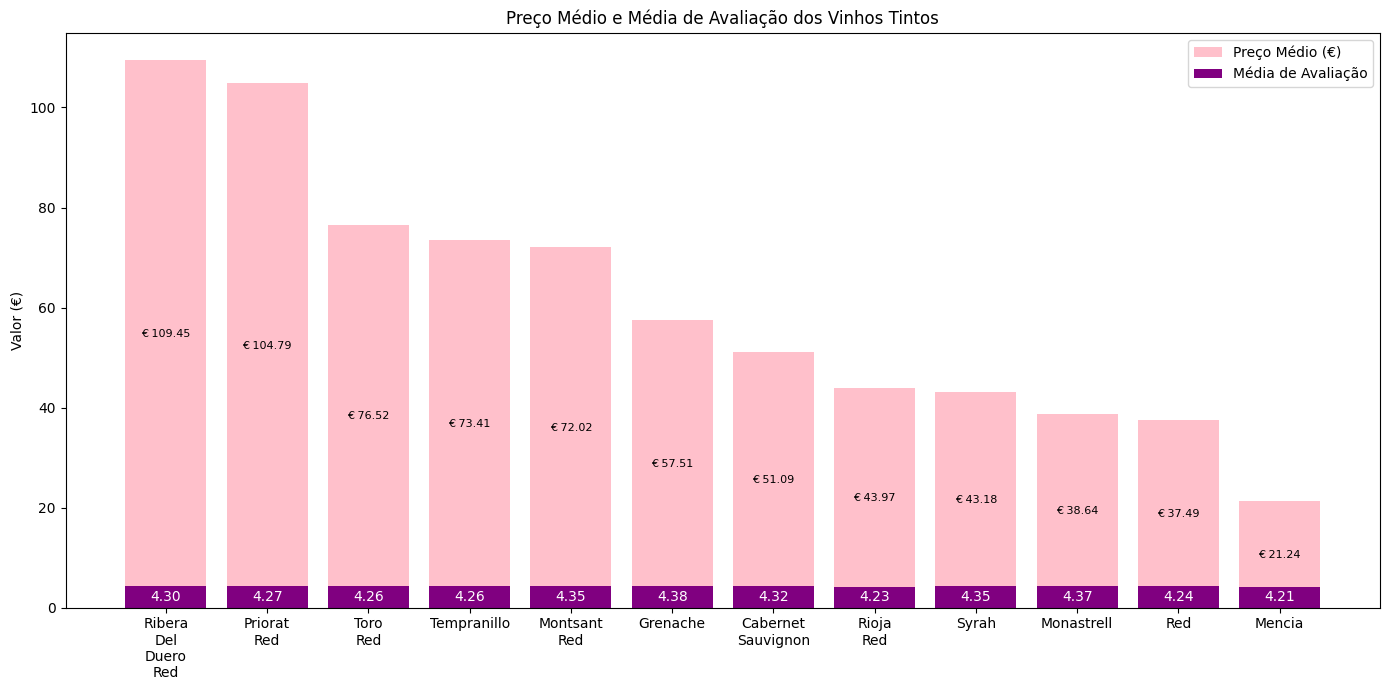

In [22]:
vinhos_tintos = df[df['Categoria'] == 'Vinhos Tintos']

media_avaliacao_tintos = vinhos_tintos.groupby('tipo')['avaliação'].mean()
media_preco_tintos = vinhos_tintos.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_tintos.sort_values(ascending=False)

media_avaliacao_tintos = media_avaliacao_tintos[ordenado_por_preco.index]
media_preco_tintos = media_preco_tintos[ordenado_por_preco.index]

bar_width = 0.8 

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(14, 7))  

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_tintos))

bars1 = ax1.bar(index, media_preco_tintos, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index, media_avaliacao_tintos, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_tintos):
    ax1.text(i, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8)  # Fonte menor para o preço

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_tintos):
    ax1.text(i, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Tintos')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos vinhos na horizontal, e quebrando as linhas
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_tintos.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos tintos o Ribera Del Duero Red é a variedade e logo após ele vem o Priorat Red, os outros vinhos estão abaixo de 80 euros. O vinho tinto mais bem avaliado (Grenache) possui um valor de vinho mediano comparado aos vinhos mais baratos e mais caros. Não existe um padrão entre avaliação e preço porém a menor avaliaçãoa qui está associada ao vinho de menor preço. O Monastrell dentre os vinhos tintos parece ser o que melhor apresenta custo benefício devido a seu preço relativamente baixo e avaliação relativamente alta.
* A diferença entre o vinho mais caro e mais barato é de: 88,21 euros
* A diferença entre o melhor avaliado (Grenache) e o pior avaliado (Mencia) é de: 0.17

**A média de preço e avaliações do vinho branco**

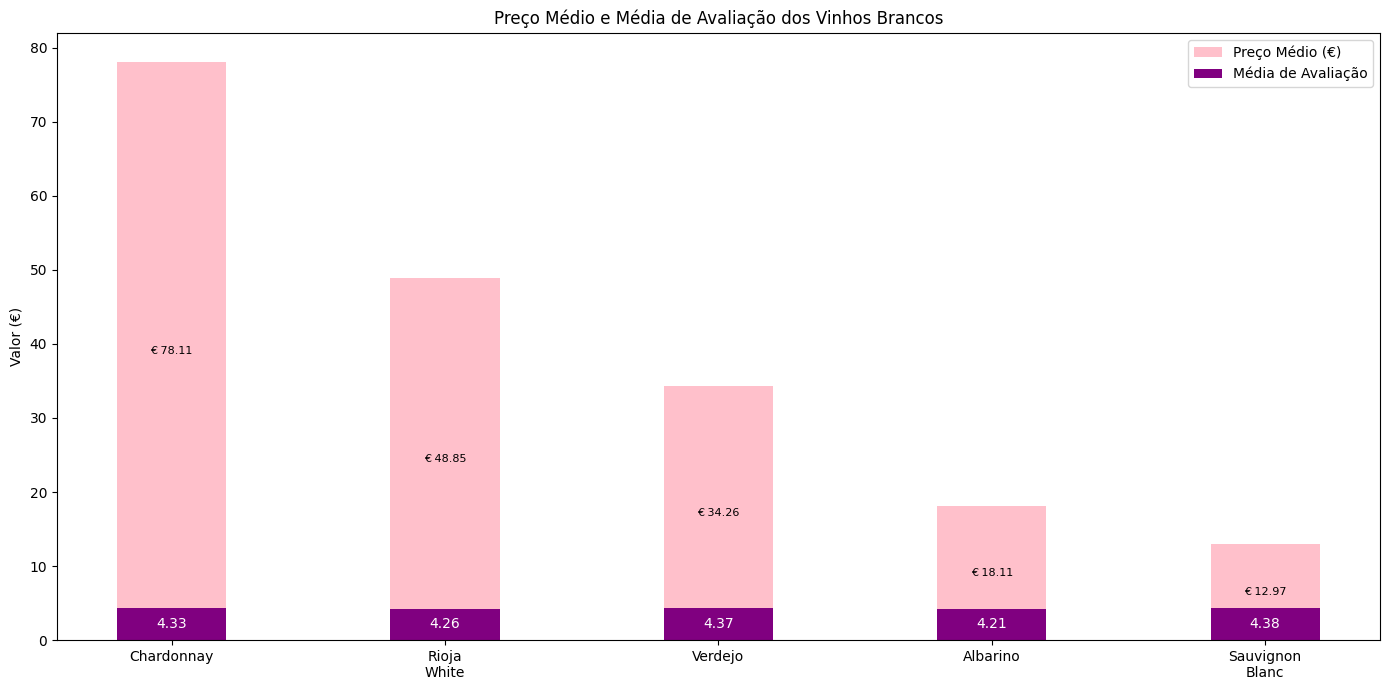

In [23]:
vinhos_brancos = df[df['Categoria'] == 'Vinhos Brancos']

media_avaliacao_brancos = vinhos_brancos.groupby('tipo')['avaliação'].mean()
media_preco_brancos = vinhos_brancos.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_brancos.sort_values(ascending=False)

media_avaliacao_brancos = media_avaliacao_brancos[ordenado_por_preco.index]
media_preco_brancos = media_preco_brancos[ordenado_por_preco.index]

bar_width = 0.4  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_brancos))
bars1 = ax1.bar(index, media_preco_brancos, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index, media_avaliacao_brancos, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_brancos):
    ax1.text(i, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8) 

# Adicionando os valores dentro da barra de avaliação
for i, v in enumerate(media_avaliacao_brancos):
    ax1.text(i, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')


ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Brancos')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos vinhos na horizontal, e quebrando as linhas
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_brancos.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos brancos o Chardonnay é a variedade mais cara após ele outros vinhos estão abaixo de 50 euros. Aqui as avaliações novamente não acompanham a risca os preços pois o vinho branco Sauvignon Blanc possui o menor preço dentre os vinhos brancos e em contraponto a maior avaliação superando o vinho mais branco mais caro, sendo ele um ótimo candidato em relação a custo e benefício. 
* A diferença entre o vinho mais caro e mais barato é de: 65.14 euros
* A diferença entre o melhor avaliado (Sauvignon Blanc) e o pior avaliado (Albarino) é de: 0.17

**A média de preço e avaliações do vinho espumante**

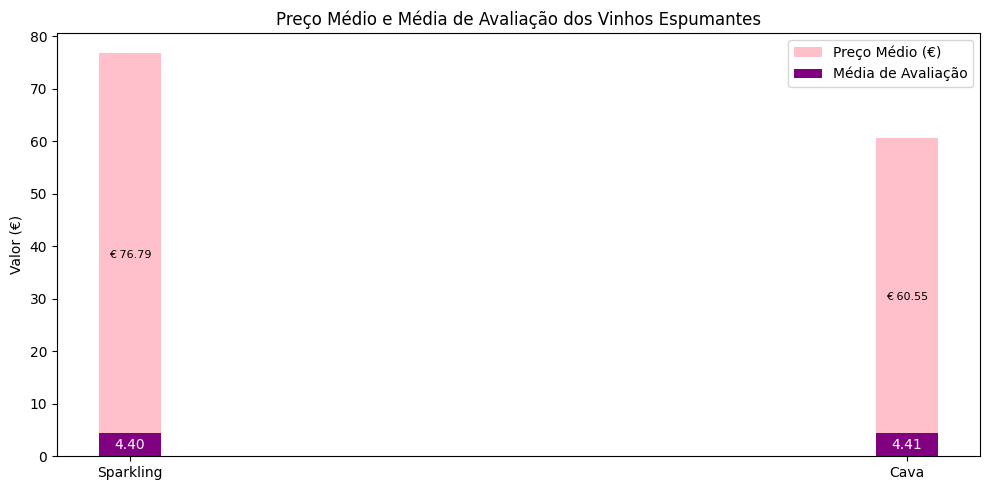

In [24]:
vinhos_espumantes = df[df['Categoria'] == 'Vinhos Espumantes']

media_avaliacao_espumantes = vinhos_espumantes.groupby('tipo')['avaliação'].mean()
media_preco_espumantes = vinhos_espumantes.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_espumantes.sort_values(ascending=False)

media_avaliacao_espumantes = media_avaliacao_espumantes[ordenado_por_preco.index]
media_preco_espumantes = media_preco_espumantes[ordenado_por_preco.index]

bar_width = 0.08  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_espumantes))

bars1 = ax1.bar(index, media_preco_espumantes, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index, media_avaliacao_espumantes, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_espumantes):
    ax1.text(i, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_espumantes):
    ax1.text(i, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Espumantes')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos vinhos na horizontal, com quebra de linha se necessário
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_espumantes.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos espumantes temos duas marcas que possuem valores próximos e avaliações muito aproximadas  
* A diferença entre o vinho mais caro e mais barato é de: 16.24 euros
* A diferença entre as avalaiações é de: 0.01

**A média de preço e avaliações do vinho fortificado**

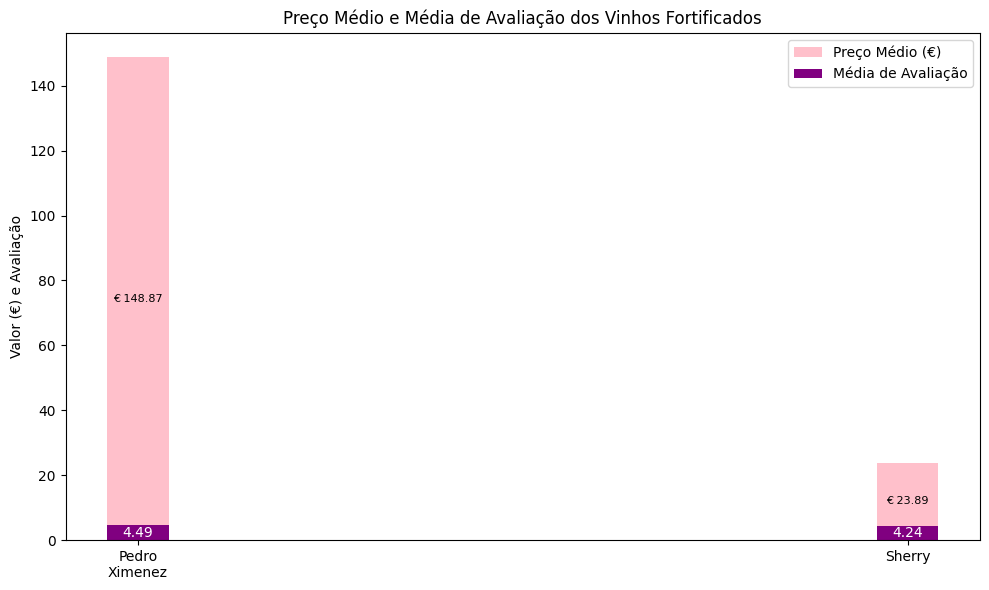

In [25]:
vinhos_fortificados = df[df['Categoria'] == 'Vinhos Fortificados']

media_avaliacao_fortificados = vinhos_fortificados.groupby('tipo')['avaliação'].mean()
media_preco_fortificados = vinhos_fortificados.groupby('tipo')['preço'].mean()

ordenado_por_preco_fortificados = media_preco_fortificados.sort_values(ascending=False)

media_avaliacao_fortificados = media_avaliacao_fortificados[ordenado_por_preco_fortificados.index]
media_preco_fortificados = media_preco_fortificados[ordenado_por_preco_fortificados.index]

bar_width = 0.08  

fig, ax1 = plt.subplots(figsize=(10, 6)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_fortificados))

bars1 = ax1.bar(index, media_preco_fortificados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index, media_avaliacao_fortificados, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_fortificados):
    ax1.text(i, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=8)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_fortificados):
    ax1.text(i, v / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Preço Médio e Média de Avaliação dos Vinhos Fortificados')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€) e Avaliação')

# Colocando os rótulos dos vinhos na horizontal, com quebra de linha se necessário
ax1.set_xticks(index)
ax1.set_xticklabels([name.replace(' ', '\n') for name in media_avaliacao_fortificados.index], rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Na análise dos vinhos fortificados temos duas marcas que possuem valores muito distantes e avaliações muito diferentes também.  
* A diferença entre o vinho mais caro e mais barato é de: 124.98 euros
* A diferença entre as avalaiações é de: 0.25

**Análise de preço e avaliação dos vinhos mais caros**

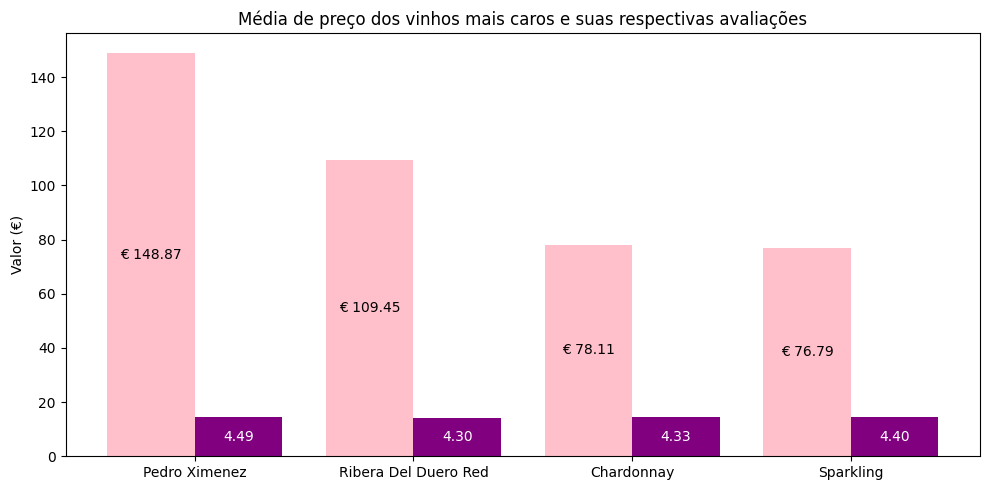

In [26]:
vinhos_selecionados = df[df['tipo'].isin(['Ribera Del Duero Red', 'Chardonnay', 'Sparkling', 'Pedro Ximenez'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_preco.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_preco.index]

bar_width = 0.4 
padding = 10  

fig, ax1 = plt.subplots(figsize=(10, 5))  # Aumentando a largura da figura

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Média de preço dos vinhos mais caros e suas respectivas avaliações')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

# Adicionando as categorias de vinhos no gráfico
##for i, wine_type in enumerate(media_avaliacao_selecionados.index):
##    ax1.text(i, -5, f'{df[df["tipo"] == wine_type]["Categoria"].iloc[0]}', ha='center', va='center', fontsize=9, color='black')

## ax1.legend()

plt.tight_layout()
plt.show()



Os vinhos mais caros estão acima dos 70 euros. Possuem avaliações consideravelmente alta a partir da casa dos 4.30. Com o vinho (Pedro Ximenez- Vinho fortificado)sendo o maior em preço e em avaliações. 

**Análise de preço e avaliação dos vinhos mais baratos**

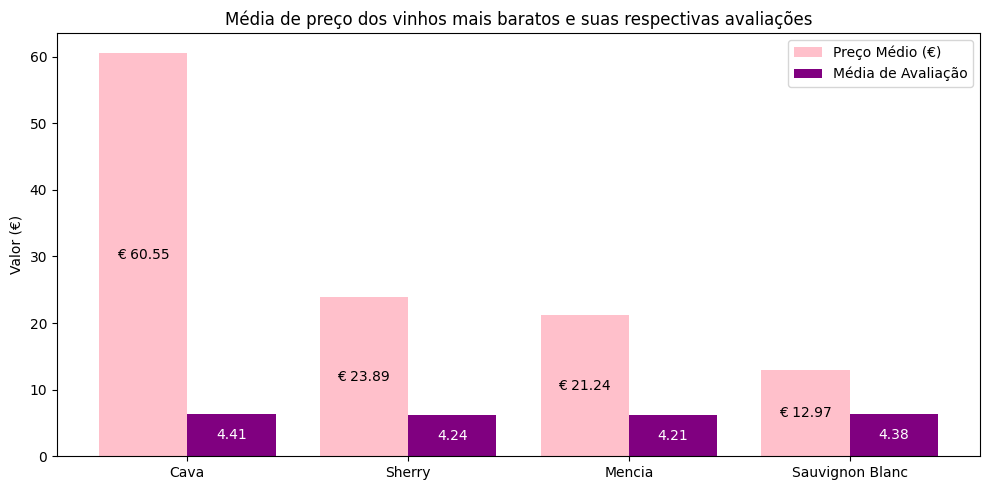

In [27]:
vinhos_selecionados = df[df['tipo'].isin(['Mencia', 'Sauvignon Blanc', 'Cava', 'Sherry'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_preco = media_preco_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_preco.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_preco.index]

bar_width = 0.4  
padding = 2  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Média de preço dos vinhos mais baratos e suas respectivas avaliações')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos tipos de vinhos
ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()



Dentre os vinhos mais baratos o (Cava - vinho espumante) possui o maior preço e maior avaliação, seguido de (Sauvignon Blac -vinho branco) que possui o menor preço e uma avaliação apenas 0.03 do Cava. Os outros dois vinhos (Sherry- Vinho fortificado) e (Mencia- Vinho Tinto), possuem valores muito próximos tanto no preço quanto na avaliação 

**Maiores medias entre os vinhos analisados**

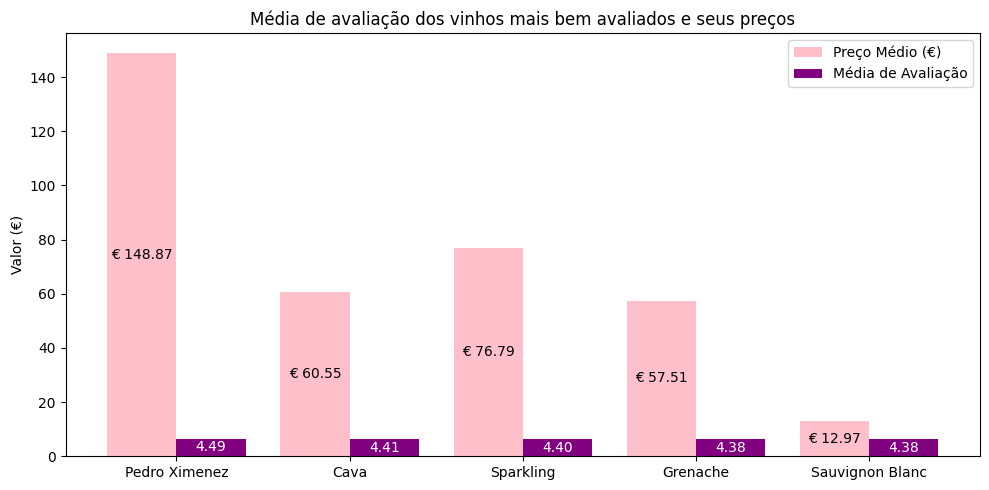

In [28]:
vinhos_selecionados = df[df['tipo'].isin(['Grenache', 'Sauvignon Blanc', 'Sparkling', 'Cava','Pedro Ximenez'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_avaliacao = media_avaliacao_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_avaliacao.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_avaliacao.index]

bar_width = 0.4 
padding = 2  

# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')


ax1.set_title('Média de avaliação dos vinhos mais bem avaliados e seus preços')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos tipos de vinhos
ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Dentre os vinhos com maiores avaliações há uma variedade de preços com dois grandes extremos (Pedro Ximenez- Vinho fortificado) e (Sauvignon Blanc- Vinho branco). Porém a maior avaliação média está voltada ao vinho de maior preço médio. O (Cava e Sparkling - aúnicos representantes de vinhos espumantes), estão no grupos dos mais bem avaliados devido a proximidade das avaliações. Ao todo não há avaliações menores de 4.38. 

**Menores medias entre os vinhos analisados**

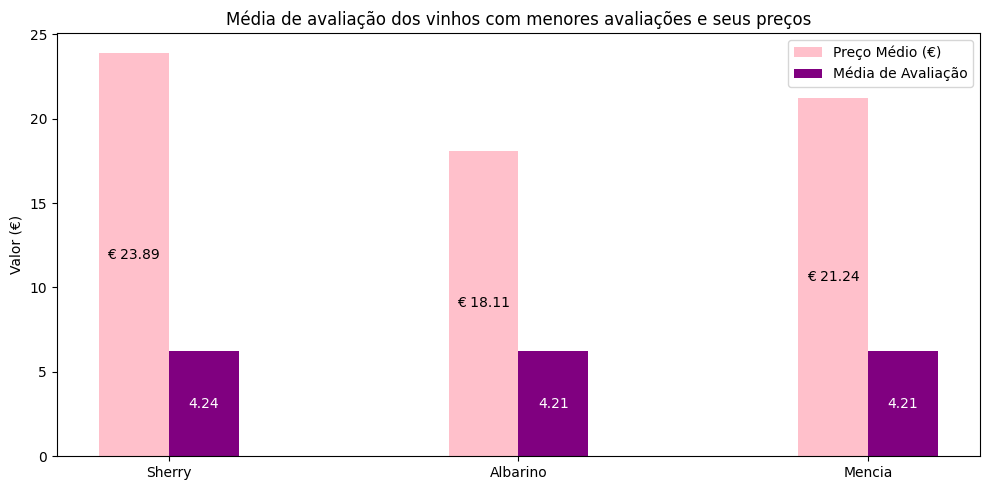

In [29]:
vinhos_selecionados = df[df['tipo'].isin(['Mencia', 'Albarino', 'Sherry'])]

media_avaliacao_selecionados = vinhos_selecionados.groupby('tipo')['avaliação'].mean()
media_preco_selecionados = vinhos_selecionados.groupby('tipo')['preço'].mean()

ordenado_por_avaliacao = media_avaliacao_selecionados.sort_values(ascending=False)

media_avaliacao_selecionados = media_avaliacao_selecionados[ordenado_por_avaliacao.index]
media_preco_selecionados = media_preco_selecionados[ordenado_por_avaliacao.index]


bar_width = 0.2  


# Plotando o gráfico de barras
fig, ax1 = plt.subplots(figsize=(10, 5)) 

# Plotando a barra de preço
index = np.arange(len(media_avaliacao_selecionados))

bars1 = ax1.bar(index - bar_width/2, media_preco_selecionados, bar_width, label='Preço Médio (€)', color='pink')

# Plotando a média de avaliação 
bars2 = ax1.bar(index + bar_width/2, media_avaliacao_selecionados + padding, bar_width, label='Média de Avaliação', color='purple', bottom=0)

# Adicionando os valores dentro da barra de preço 
for i, v in enumerate(media_preco_selecionados):
    ax1.text(i - bar_width/2, v / 2, f'€ {v:.2f}', ha='center', va='center', fontsize=10)  

# Adicionando os valores dentro da barra de avaliação 
for i, v in enumerate(media_avaliacao_selecionados):
    ax1.text(i + bar_width/2, (v + padding) / 2, f'{v:.2f}', ha='center', va='center', fontsize=10, color='white')

ax1.set_title('Média de avaliação dos vinhos com menores avaliações e seus preços')
ax1.set_xlabel("")
ax1.set_ylabel('Valor (€)')

# Colocando os rótulos dos tipos de vinhos
ax1.set_xticks(index)
ax1.set_xticklabels(media_avaliacao_selecionados.index, rotation=0, ha='center')

ax1.legend()

plt.tight_layout()
plt.show()


Dentre os vinhos com menores avaliações médias estão (Albarino - vinho branco) e (Mencia - vinho tinto) com 4.21 seguido de (Sherry - vinho fortificante) com 4.24. Aqui nesse grupo é possível notar uma média de preço muito próxima que não supera os 25 euros e avaliações na casa dos 4.20. 



#### 3.Há alguma relação entre a avaliação e o preço médio dos vinhos?

In [30]:
correlation = df['preço'].corr(df['avaliação'])
print('Correlação entre preço e avaliação:', correlation)

Correlação entre preço e avaliação: 0.5448089273237432


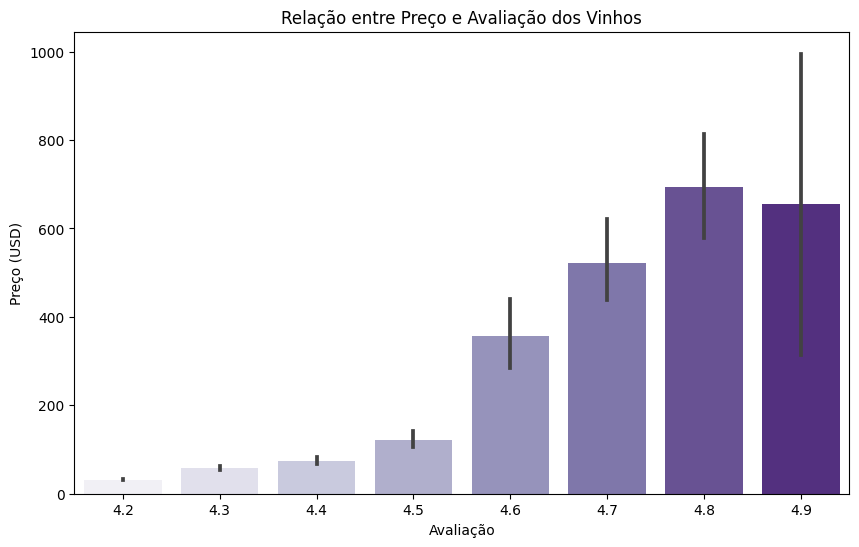

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="avaliação", y="preço", palette="Purples")
plt.title("Relação entre Preço e Avaliação dos Vinhos")
plt.xlabel("Avaliação")
plt.ylabel("Preço (USD)")
plt.show()

A análise das variáveis Avaliação e Preço indica uma correlação positiva moderada de 0,54 entre o valor do vinho e sua avaliação. Isso significa que, em média, vinhos com preços mais elevados tendem a receber notas mais altas, sugerindo uma percepção de maior qualidade associada a vinhos mais caros. No entanto, como a correlação não é extremamente forte, também existem vinhos de preço mais acessível que são bem avaliados.

#### 4.Quais são os melhores anos de vinhos avaliados? São os mais antigos?  

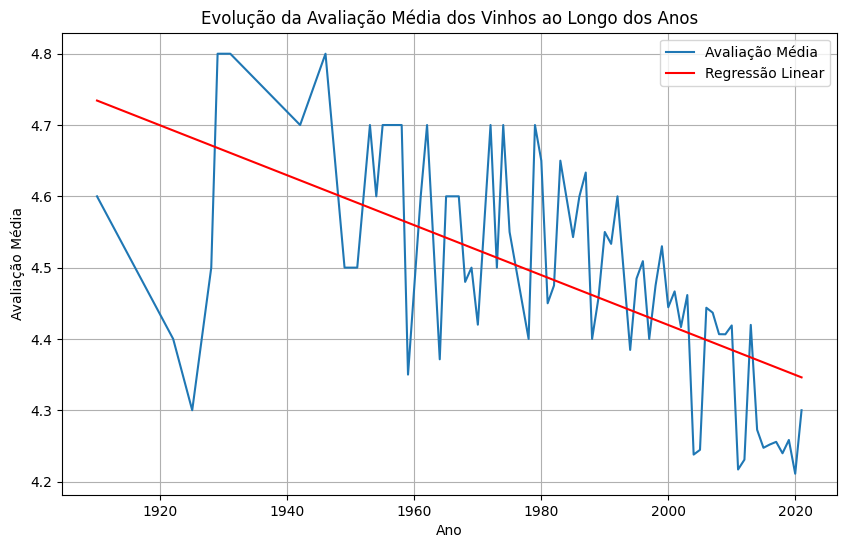

In [32]:
media_por_ano = df.groupby('ano')['avaliação'].mean()

slope, intercept, r_value, p_value, std_err = linregress(media_por_ano.index, media_por_ano.values)

plt.figure(figsize=(10, 6))
plt.plot(media_por_ano.index, media_por_ano.values, label='Avaliação Média')

plt.plot(media_por_ano.index, slope * media_por_ano.index + intercept, color='red', label='Regressão Linear')

plt.xlabel('Ano')
plt.ylabel('Avaliação Média')
plt.title('Evolução da Avaliação Média dos Vinhos ao Longo dos Anos')
plt.grid(True)
plt.legend()
plt.show()

A média de avaliação, apesar de apresentar grande variação ao longo do tempo, sofreu uma tendência de regressão nos anos mais recentes.

In [33]:
top_5_anos = media_por_ano.nlargest(5)

<Figure size 1000x600 with 0 Axes>

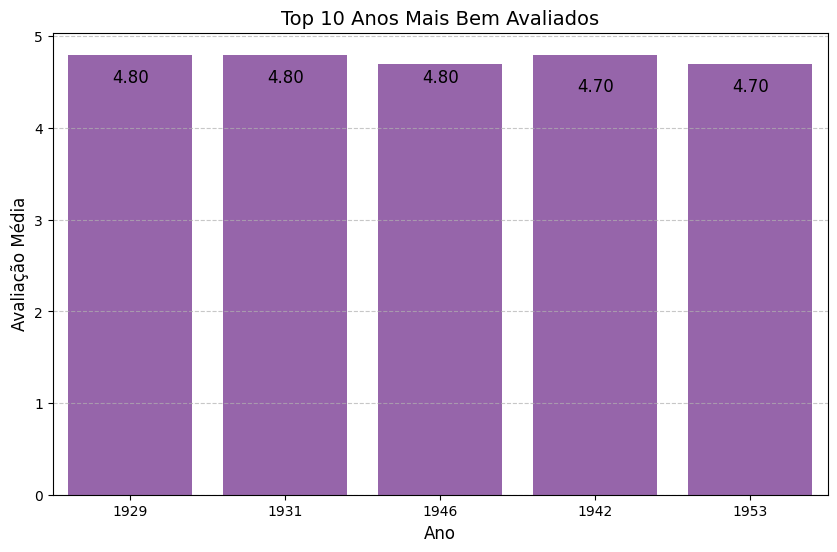

In [34]:
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_anos.index, y=top_5_anos.values, color='#9B59B6')

for i, value in enumerate(top_5_anos.values):
    plt.text(i, value - 0.15, f'{value:.2f}', ha='center', va='top', fontsize=12, color='black')

plt.title('Top 10 Anos Mais Bem Avaliados', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Avaliação Média', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(len(top_5_anos.index)), labels=[int(year) for year in top_5_anos.index])
plt.show()

Entre os anos de 1929 e 1942, destacam-se os vinhos com as melhores avaliações, apresentando uma média de 4,8. Esses vinhos são reconhecidos por sua alta qualidade e prestígio. Embora a diversidade de vinhos tenha aumentado ao longo do tempo, os vinhos mais antigos continuam a ser os mais bem avaliados, indicando uma possível correlação entre a longevidade e a excelência percebida, independentemente das variações no mercado atual.

6. 

#### 5. A acidez ou o corpo dos vinhos influenciam a avaliação média dos usuários?

Abaixo está sendo calculado a média de avaliação dos vinhos com base na acidez e no corpo:

In [35]:
grupo_acidez = df.groupby(['acidez'])['avaliação'].mean().reset_index()

In [36]:
grupo_corpo = df.groupby(['corpo'])['avaliação'].mean().reset_index()

In [37]:
grupo_acidez_corpo = df.groupby(['acidez', 'corpo'])['avaliação'].mean().reset_index()

In [38]:
grupo_acidez.head(10)

,acidez,avaliação
0,0,4.230111
1,1,4.494286
2,2,4.267164
3,3,4.257814


In [39]:
grupo_corpo.head(10)

,corpo,avaliação
0,0,4.230111
1,2,4.423529
2,3,4.228391
3,4,4.245631
4,5,4.301909


In [40]:
grupo_acidez_corpo.head(10)

,acidez,corpo,avaliação
0,0,0,4.230111
1,1,5,4.494286
2,2,4,4.267164
3,3,2,4.423529
4,3,3,4.228391
5,3,4,4.244133
6,3,5,4.297671


Nos resultados acima vemos que os valores de média estão bastante próximos entre os grupos, quase não tendo diferença significativa em relação a acidez e corpo.

E para entender melhor os valores numéricos de acidez e corpo do vinho, foi feito uma pesquisa online para saber o real significado, caso fosse um valor categórico nominal.

1. O corpo de um vinho é a sensação de "peso" que ele deixa na boca e pode ser categorizado em uma escala de 0 a 5.

* *0*: Corpo leve – vinho leve, mas com um pouco mais de estrutura; comum em vinhos brancos e tintos suaves.
* *2*: Corpo médio-leve – oferece alguma estrutura, com um pouco mais de presença na boca, mas ainda fácil de beber.
* *3*: Corpo médio – equilíbrio entre intensidade e suavidade; vinhos com taninos moderados, álcool e presença na boca.
* *4*: Corpo médio-encorpado – vinho com boa presença, mais peso e intensidade; vinhos mais complexos, com taninos e álcool mais evidentes.
* *5*: Corpo encorpado – vinho robusto e intenso, com alto teor de taninos e álcool; sensação rica e densa na boca, geralmente com sabores mais concentrados.

2. A acidez de um vinho reflete o frescor e a vivacidade do sabor. Em vinhos, uma acidez mais alta (representada por valores maiores) contribui para um sabor mais "crocante" e refrescante.

 * *0*: Acidez baixa – vinho ainda suave, mas com uma leve presença de frescor; pode ser percebido como "redondo" ou "suave".
 * *1*: Acidez média-baixa – apresenta algum frescor, mas sem ser dominante; comum em vinhos mais maduros.
 * *2*: Acidez média – um bom equilíbrio entre suavidade e frescor; vinhos equilibrados, com sabor vibrante sem ser muito ácido.
 * *3*: Acidez alta – vinho muito fresco e vibrante, com acidez acentuada; sensação de "crocância", comum em vinhos brancos e tintos leves.

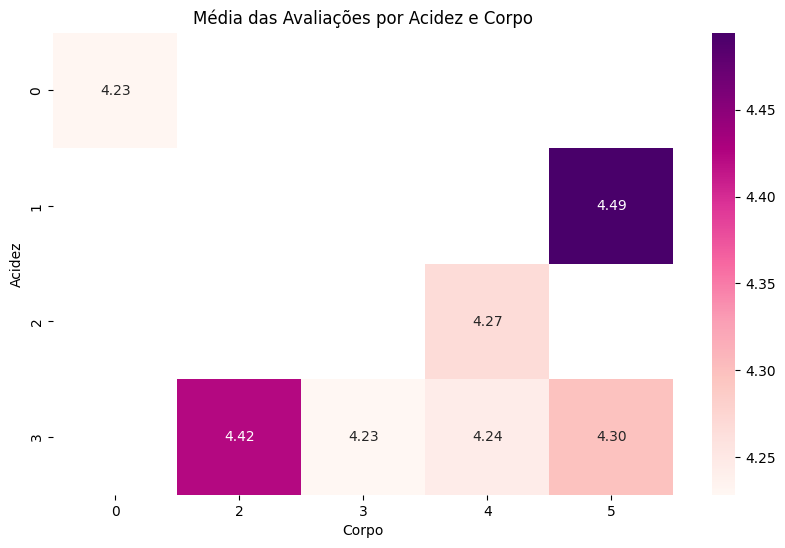

In [41]:
heatmap_data = grupo_acidez_corpo.pivot(index='acidez', columns='corpo', values='avaliação')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="RdPu", fmt=".2f")
plt.title('Média das Avaliações por Acidez e Corpo')
plt.xlabel('Corpo')
plt.ylabel('Acidez')
plt.show()

Acima temos uma Análise da média das avaliações com base na acidez e no corpo dos vinhos, com o eixo x representando o corpo com valores de 0 a 5 e o eixo y a acidez com valores de 0 a 3 e as cores variando tons de azul a média da avaliação e temos uma observação gráfica de onde a avaliação é maior ou menor.

#### 6. Correlação entre as variáveis. Quais as maiores e menores?

## 4. Insights



**Top 3 Vinhos mais baratos e mais caros e suas respectivas vinícolas:**

* **Vinhos mais caros:**
    * Dominados por vinícolas do Noroeste da Espanha, em regiões montanhosas.
    * Destaque para vinhos como Pedro Ximenez (fortificado) e Chardonnay.
* **Vinhos mais baratos:**
    * Concentrados em vinícolas do Centro-Norte da Espanha, em regiões de menor altitude.
    * Destaque para vinhos como Cava (espumante), Sauvignon Blanc e Mencia.

**O tipo de vinho afeta a avaliação média ou o preço?**

* **Preço:**
    * Existe uma grande variação de preços entre os diferentes tipos de vinho.
    * Vinhos fortificados e tintos tendem a ser mais caros, enquanto espumantes e brancos costumam ser mais acessíveis.
    * A região de origem e a variedade de uva influenciam significativamente o preço.
* **Avaliação média:**
    * A avaliação média varia entre os tipos de vinho, mas não há uma relação direta com o preço.
    * Vinhos fortificados e espumantes tendem a ter avaliações mais altas, mas há exceções.
    * A variedade de uva e as características sensoriais (corpo e acidez) também influenciam a avaliação.
* **Custo-benefício:**
    * Alguns vinhos oferecem um excelente custo-benefício, como o Sauvignon Blanc (branco) e o Monastrell (tinto).
    * A avaliação não é sempre diretamente proporcional ao preço.

**Relação entre Preço e Avaliação:**

* **Correlação positiva:**
    * Existe uma relação direta entre o preço de um vinho e sua avaliação. Ou seja, quanto mais caro o vinho, mais alta tende a ser sua avaliação.
    * A correlação de 0.54481 indica que o preço exerce uma influência moderada sobre a avaliação, não sendo o único fator determinante.

* **Tendência da Avaliação ao Longo do Tempo:**
    * As avaliações dos vinhos apresentam uma grande dispersão, ou seja, há muita diferença entre as notas atribuídas a diferentes vinhos.
    * Apesar da alta variabilidade, observa-se uma tendência geral de redução na média das avaliações ao longo dos anos.

**Avaliação dos Melhores Vinhos Avaliação ao Longo do Tempo**
   * Vinhos produzidos entre 1929 e 1942 se destacam com a melhor média de avaliações, alcançando 4,8. Esses vinhos são reconhecidos por sua excelência e prestígio, com uma possível correlação entre a longevidade e a percepção de qualidade. Mesmo com a maior diversidade de vinhos no mercado atual, os vinhos mais antigos continuam a ser os mais bem avaliados, o que sugere que a qualidade atemporal e as técnicas de vinificação da época conferem uma vantagem sobre vinhos mais recentes.

**A acidez e o corpo dos vinhos na influência da avaliação dos usuários**

   * Não foi observada uma grande diferença na média das avaliações com relação à correlação entre corpo e acidez dos vinhos, indicando que as variações entre essas características têm um impacto pequeno nas avaliações. Portanto, não é possível concluir de forma definitiva se essas características influenciam significativamente a avaliação dos usuários.
   * No entanto, ao analisar os dados, pode-se observar que a combinação de corpo 0 (leve) e acidez 0 (baixa) tende a gerar avaliações mais baixas, sugerindo que vinhos com essas características podem não ser bem recebidos pelos consumidores.
   * Por outro lado, a combinação de corpo 5 (encorpado) e acidez 1 (média baixa) apresenta as melhores avaliações, o que indica que esses vinhos podem ser mais apreciados pelos usuários.
   * Vale ressaltar que as diferenças entre as características analisadas são pequenas, e para tirar conclusões mais precisas, seria necessário realizar outros tipos de análise ou considerar outras variáveis que também possam impactar as avaliações dos usuários.

**Outros Insights:**

* **Dispersão de avaliações:** Há uma grande variação no número de avaliações por vinho.
* **Características sensoriais:** A maioria dos vinhos apresenta corpo entre 3 e 5 e acidez entre 0 e 3.
* **Vinhos tintos:** Ribera Del Duero Red e Priorat Red são as variedades mais comuns.
* **Vinhos brancos:** Chardonnay é a variedade mais cara.
* **Vinhos espumantes:** Cava é a variedade mais comum.